# An Analysis of the Effect of Covid-19 on niceride Rentals in Minneapolis

### Project 1, Group 6 : Rachel Fizel, Luis Gomez, Brandon Overlie, Stephanie Richards

Our project examined the effect of the Covid-19 pandemic on niceride rental and ridership patterns in 2020 as compared to previous years. We used data for the years 2015-2020 from [niceride](https://s3.amazonaws.com/niceride-data/index.html) as the basis for our comparisons, and supplemented that data with information on Covid from [the office of the Governor](https://mn.gov/governor/news/executiveorders.jsp), weather data from [NOAA](https://www.ncdc.noaa.gov/cdo-web/), and Google Maps.

Our research questions were:
> - Did the Covid-19 pandemic affect overall niceride usage compared to previous years?
> - Did the pandemic affect types of ridership (ie, Member versus Casual riders)?
> - Did specific events or Covid restricitons during the 2020 season affect ridership?
> - Can we see changes in geographic ridership patterns in 2020 as compared to previous years?

Our hypothesis was that we would see a stable or increasing number of riders from 2015 through 2019, and then a dramatic drop in 2020. We expected to see that ridership decreased when the Governor issued stay-at-home orders, and during the curfews after the death of George Floyd, and that ridership increased in response to the lifting of orders and easing of restrictions. Finally, we expected that we would see fewer rides originating in downtown and around the U of M neighborhoods than in previous years, as offices and univerities closed and people worked or learned from home. 

### Import data and set up for working

In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as st

import gmaps
# Import API key
from api_keys import g_key

In [2]:
#Import cleaned niceride csv data from individual year notebooks

csv_path = "Resources/Nice_ride_trip_history_"
year_2015 = pd.read_csv(f"{csv_path}2015_season.csv", low_memory=False)
year_2016 = pd.read_csv(f"{csv_path}2016_season.csv", low_memory=False)
year_2017 = pd.read_csv(f"{csv_path}2017_season.csv", low_memory=False)
year_2018 = pd.read_csv(f"{csv_path}2018_season.csv", low_memory=False)
year_2019 = pd.read_csv(f"{csv_path}2019_season.csv", low_memory=False)
year_2020 = pd.read_csv(f"{csv_path}2020_season.csv", low_memory=False)

### Create Initial Data Frames

In [3]:
# 2015
df_2015 = pd.DataFrame(year_2015)
#df_2015.head() # start date 4/1/2015
#df_2015.tail() # end date 11/1/2015

# 2015 Fix dtypes
df_2015.start_datetime = pd.to_datetime(df_2015.start_datetime)
df_2015.end_datetime = pd.to_datetime(df_2015.end_datetime)
df_2015.start_station_name = df_2015.start_station_name.astype(str)
df_2015.end_station_name = df_2015.end_station_name.astype(str)
df_2015.account_type = df_2015.account_type.astype(str)
df_2015.start_station_id = df_2015.start_station_id.astype(str)
df_2015.end_station_id = df_2015.end_station_id.astype(str)
#df_2015.dtypes

In [4]:
# 2016
df_2016 = pd.DataFrame(year_2016)
#df_2016.head() # start date 4/4/2016
#df_2016.tail() # end date 11/6/2016

# 2016 Fix dtypes
df_2016.start_datetime = pd.to_datetime(df_2016.start_datetime)
df_2016.end_datetime = pd.to_datetime(df_2016.end_datetime)
df_2016.start_station_name = df_2016.start_station_name.astype(str)
df_2016.end_station_name = df_2016.end_station_name.astype(str)
df_2016.account_type = df_2016.account_type.astype(str)
df_2016.start_station_id = df_2016.start_station_id.astype(str)
df_2016.end_station_id = df_2016.end_station_id.astype(str)
#df_2016.dtypes

In [5]:
# 2017
df_2017 = pd.DataFrame(year_2017)
#df_2017.head() # start date 4/3/2017
#df_2017.tail() # end date 11/5/2017

# 2017 Fix dtypes
df_2017.start_datetime = pd.to_datetime(df_2017.start_datetime)
df_2017.end_datetime = pd.to_datetime(df_2017.end_datetime)
df_2017.start_station_name = df_2017.start_station_name.astype(str)
df_2017.end_station_name = df_2017.end_station_name.astype(str)
df_2017.account_type = df_2017.account_type.astype(str)
df_2017.start_station_id = df_2017.start_station_id.astype(str)
df_2017.end_station_id = df_2017.end_station_id.astype(str)
#df_2017.dtypes

In [6]:
# 2018
df_2018 = pd.DataFrame(year_2018)
#df_2018.head() # start date 4/12/2018
#df_2018.tail() # end date 11/17/2018

# 2018 Fix dtypes
df_2018.start_datetime = pd.to_datetime(df_2018.start_datetime)
df_2018.end_datetime = pd.to_datetime(df_2018.end_datetime)
df_2018.start_station_name = df_2018.start_station_name.astype(str)
df_2018.end_station_name = df_2018.end_station_name.astype(str)
df_2018.account_type = df_2018.account_type.astype(str)
df_2018.start_station_id = df_2018.start_station_id.astype(str)
df_2018.end_station_id = df_2018.end_station_id.astype(str)
#df_2018.dtypes

In [7]:
# 2019
df_2019 = pd.DataFrame(year_2019)
#df_2019.head() # start date 4/22/2019
#df_2019.tail() # end date 11/30/2019

# 2019 Fix dtypes
df_2019.start_datetime = pd.to_datetime(df_2019.start_datetime)
df_2019.end_datetime = pd.to_datetime(df_2019.end_datetime)
df_2019.start_station_name = df_2019.start_station_name.astype(str)
df_2019.end_station_name = df_2019.end_station_name.astype(str)
df_2019.account_type = df_2019.account_type.astype(str)
df_2019.start_station_id = df_2019.start_station_id.astype(str)
df_2019.end_station_id = df_2019.end_station_id.astype(str)
#df_2019.dtypes

In [8]:
# 2020 
df_2020 = pd.DataFrame(year_2020)
#df_2020.head() #start date 4/1/2020
#df_2020.tail() #end date 11/4/2020

# 2020 Fix dtypes
df_2020.start_datetime = pd.to_datetime(df_2020.start_datetime)
df_2020.end_datetime = pd.to_datetime(df_2020.end_datetime)
df_2020.start_station_name = df_2020.start_station_name.astype(str)
df_2020.end_station_name = df_2020.end_station_name.astype(str)
df_2020.account_type = df_2020.account_type.astype(str)
df_2020.start_station_id = df_2020.start_station_id.astype(str)
df_2020.end_station_id = df_2020.end_station_id.astype(str)
#df_2020.dtypes

In [9]:
# Define function to extract date information from datetime
    
def extract_date(x):
    x["year"] = x.start_datetime.dt.year
    x["month"] = x.start_datetime.dt.month
    x["day"] = x.start_datetime.dt.day

In [10]:
# Extract dates and add new columns to dfs

x = df_2015
extract_date(x)

x = df_2016
extract_date(x)

x = df_2017
extract_date(x)

x = df_2018
extract_date(x)

x = df_2019
extract_date(x)

x = df_2020
extract_date(x)

# This is the Steph section - begin here

In [11]:
# Copy data for steph section

s_2015 = df_2015.copy()
s_2016 = df_2016.copy()
s_2017 = df_2017.copy()
s_2018 = df_2018.copy()
s_2019 = df_2019.copy()
s_2020 = df_2020.copy()

In [12]:
# Define function to extract day of week from datetime
# NOTE: for dayofweek: 0 = Monday, 6 = Sunday

def get_dayofweek(x):    
    start = x.start_datetime[0]
    end = x.start_datetime[len(x.start_datetime)-1]
    s = pd.date_range(start, end, freq="D").to_series()
    #print(s)
    s = list(s.dt.dayofweek)
    return s

#### Examination of the full 2020 season by day; comparison to previous years and the 2020 timeline

In order to accurately compare the niceride data from 2020 to previous years, we had to account for the fact that the different seasons had different opening and closing dates, and were not all the same length. In addition, data for 4/5 and 5/31 were missing from the 2020 dataset. In order to even out the data so we could compare it, we defined each season as spanning from 4/1 to 11/30, and added placeholder zeroes for days that did not have data. This gave us six timelines of equal length that we could compare accurately by date. We also collected the day of the week from the data frames, so we could look to see if ridership patterns changed with regards to weekdays vs. weekends.

In [13]:
# Calculate total number of rides per day, by year
# 2015

# Group by month, day
grouped_2015 = s_2015.groupby([s_2015["month"], s_2015["day"]]).count()
grouped_2015 = grouped_2015["start_datetime"]
grouped_2015 = pd.DataFrame(grouped_2015)
grouped_2015 = grouped_2015.rename(columns={"start_datetime" : "num_rides"})
#grouped_2015.head()

# Get day of the week
x = s_2015
s = get_dayofweek(x)
grouped_2015["dayofweek"] = s
grouped_2015.head()

num_rides  dayofweek
month day                      
4     1          557          2
      2         1037          3
      3          692          4
      4         1292          5
      5          605          6

In [14]:
# 2016

grouped_2016 = s_2016.groupby([s_2016["month"], s_2016["day"]]).count()
grouped_2016 = grouped_2016["start_datetime"]
grouped_2016 = pd.DataFrame(grouped_2016)
grouped_2016 = grouped_2016.rename(columns={"start_datetime" : "num_rides"})
#grouped_2016.head()

x = s_2016
s = get_dayofweek(x)
grouped_2016["dayofweek"] = s
grouped_2016.head()

num_rides  dayofweek
month day                      
4     4          197          0
      5          284          1
      6          471          2
      7          446          3
      8          436          4

In [15]:
# 2017

grouped_2017 = s_2017.groupby([s_2017["month"], s_2017["day"]]).count()
grouped_2017 = grouped_2017["start_datetime"]
grouped_2017 = pd.DataFrame(grouped_2017)
grouped_2017 = grouped_2017.rename(columns={"start_datetime" : "num_rides"})
#grouped_2017.head()

x = s_2017
s = get_dayofweek(x)
grouped_2017["dayofweek"] = s
grouped_2017.head()

num_rides  dayofweek
month day                      
4     3          543          0
      4         1385          1
      5         1205          2
      6         1305          3
      7         1659          4

In [16]:
# 2018

grouped_2018 = s_2018.groupby([s_2018["month"], s_2018["day"]]).count()
grouped_2018 = grouped_2018["start_datetime"]
grouped_2018 = pd.DataFrame(grouped_2018)
grouped_2018 = grouped_2018.rename(columns={"start_datetime" : "num_rides"})
#grouped_2018.head()

x = s_2018
s = get_dayofweek(x)
grouped_2018["dayofweek"] = s
grouped_2018.head()

num_rides  dayofweek
month day                      
4     12         212          3
      13         202          4
      14          19          5
      15          17          6
      16          32          0

In [17]:
# 2019

grouped_2019 = s_2019.groupby([s_2019["month"], s_2019["day"]]).count()
grouped_2019 = grouped_2019["start_datetime"]
grouped_2019 = pd.DataFrame(grouped_2019)
grouped_2019 = grouped_2019.rename(columns={"start_datetime" : "num_rides"})
#grouped_2019.head()

x = s_2019
s = get_dayofweek(x)
grouped_2019["dayofweek"] = s
grouped_2019.head()

num_rides  dayofweek
month day                      
4     22         156          0
      23        1100          1
      24        1351          2
      25        1387          3
      26        1387          4

In [18]:
# 2020

grouped_2020 = s_2020.groupby([s_2020["month"], s_2020["day"]]).count()
grouped_2020 = grouped_2020["start_datetime"]
grouped_2020 = pd.DataFrame(grouped_2020)
grouped_2020 = grouped_2020.rename(columns={"start_datetime" : "num_rides"})
len(grouped_2020)

216

In [19]:
# 2020 is missing two dates in the middle of the range that must be accounted for
# before we can figure out day of the week:

x = s_2020
start = x.start_datetime[0]
end = x.start_datetime[len(x.start_datetime)-1]
s = pd.date_range(start, end, freq="D").to_list()
print(s.pop(4))
print(s.pop(59))
s=pd.Series(s)
s = list(s.dt.dayofweek)
grouped_2020["dayofweek"] = s
grouped_2020.head()

2020-04-05 13:47:57
2020-05-31 13:47:57


num_rides  dayofweek
month day                      
4     1          303          2
      2          194          3
      3          215          4
      4          278          5
      6          126          0

In [20]:
#Calculate daily rides by year

#2015
daily_rides_15 = list(grouped_2015.num_rides)
print(f"2015: {len(daily_rides_15)}")

#2016
daily_rides_16 = list(grouped_2016.num_rides)
print(f"2016: {len(daily_rides_16)}")

#2017
daily_rides_17 = list(grouped_2017.num_rides)
print(f"2017: {len(daily_rides_17)}")
      
#2018
daily_rides_18 = list(grouped_2018.num_rides)
print(f"2018: {len(daily_rides_18)}")

#2019
daily_rides_19 = list(grouped_2019.num_rides)
print(f"2019: {len(daily_rides_19)}")

#2020
daily_rides_20 = list(grouped_2020.num_rides)
print(f"2020: {len(daily_rides_20)}")
#daily_rides_20


2015: 215
2016: 217
2017: 217
2018: 220
2019: 223
2020: 216


In [21]:
# It is necessary for all years to hold the same number of values
# For values that are missing, we should insert a zero:
# 2015

for n in range(29):
    daily_rides_15.append(int(0))    
    
daily_rides_15
len(daily_rides_15)

244

In [22]:
#2016

for n in range (3):
    daily_rides_16.insert(0, 0)
for n in range(24):
    daily_rides_16.append(int(0))
    
len(daily_rides_16)

244

In [23]:
# 2017

for n in range(2):
    daily_rides_17.insert(0, 0)
for n in range(25):
    daily_rides_17.append(int(0))
    
len(daily_rides_17)

244

In [24]:
# 2018

for n in range(11):
    daily_rides_18.insert(0, 0)
for n in range(13):
    daily_rides_18.append(int(0))
    
len(daily_rides_18)

244

In [25]:
# 2019

for n in range(21):
    daily_rides_19.insert(0, 0)
    
len(daily_rides_19)

244

In [26]:
# 2020

daily_rides_20.insert(4,0)
daily_rides_20.insert(60,0)
daily_rides_copy = daily_rides_20.copy()

for n in range(26):
    daily_rides_20.append(int(0))

len(daily_rides_20)

244

In [27]:
rides_by_month = pd.DataFrame({"2015" : daily_rides_15,
                               "2016" : daily_rides_16,
                               "2017" : daily_rides_17,
                               "2018" : daily_rides_18,
                               "2019" : daily_rides_19,
                               "2020" : daily_rides_20})
rides_by_month

,2015,2016,2017,2018,2019,2020
0,557,0,0,0,0,303
1,1037,0,0,0,0,194
2,692,0,543,0,0,215
3,1292,197,1385,0,0,278
4,605,284,1205,0,0,0
...,...,...,...,...,...,...
239,0,0,0,0,214,0
240,0,0,0,0,27,0
241,0,0,0,0,11,0
242,0,0,0,0,29,0


In [28]:
# Define xticks for plot by day

Apr = 1
May = 30 + 1
June = 30 + 31 + 1
July = 30 + 31 + 30 + 1
Aug = 30 + 31 + 30 + 31 + 1
Sep = 30 + 31 + 30 + 31 + 31 + 1
Oct = 30 + 31 + 30 + 31 + 31 + 30 + 1
Nov = 30 + 31 + 30 + 31 + 31 + 30 + 31 + 1

month_locations = np.array([Apr, May, June, July, Aug, Sep, Oct, Nov])
print(month_locations)

month_labels = np.array(["April", "May", "June", "July", "August", "September", "October", "November"])
print(month_labels)

[  1  31  62  92 123 154 184 215]
['April' 'May' 'June' 'July' 'August' 'September' 'October' 'November']


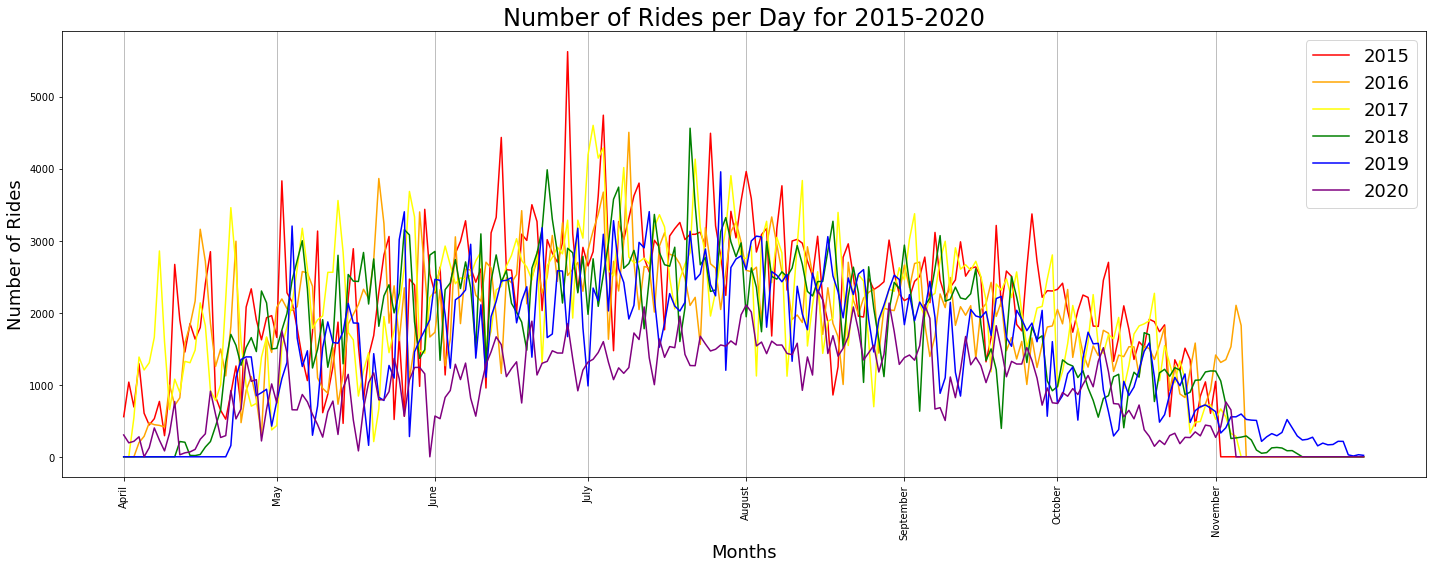

In [29]:
# Define parameters for plot by day

plt.figure(figsize=(20,8))
#2015
x_2015 = np.arange(1,245,1)
y_2015 = rides_by_month["2015"]
plt.plot(x_2015, y_2015, label="2015", color="red")
#2016
x_2016 = np.arange(1,245,1)
y_2016 = rides_by_month["2016"]
plt.plot(x_2016, y_2016, label ="2016", color="orange")
#2017
x_2017 = np.arange(1,245,1)
y_2017 = rides_by_month["2017"]
plt.plot(x_2017, y_2017, label="2017", color="yellow")
#2018
x_2018 = np.arange(1,245,1)
y_2018 = rides_by_month["2018"]
plt.plot(x_2018, y_2018, label="2018", color="green")
#2019
x_2019 = np.arange(1,245,1)
y_2019 = rides_by_month["2019"]
plt.plot(x_2019, y_2019, label="2019", color="blue")
#2020
x_2020 = np.arange(1,245,1)
y_2020 = rides_by_month["2020"]
plt.plot(x_2020, y_2020, label="2020", color="purple")

plt.xticks(month_locations, month_labels, rotation="vertical")
plt.title("Number of Rides per Day for 2015-2020", fontsize=24)
plt.xlabel("Months", fontsize=18)
plt.ylabel("Number of Rides", fontsize=18)
plt.legend(loc="best", fontsize=18)
plt.grid(axis = "x")
plt.tight_layout()
plt.savefig("Images/Yearly-Rides-Per-Day.png")
plt.show()

In this chart, we can see an overall arc in ridership that seems consistent through all years: ridership slowly increases from the beginning of the season, peaks in July and August, and then declines through the end of the season. We can also see that the purple line, representing 2020, falls consistently below the previous years' lines, although perhaps not as far below as we expected.

#### Comparison of the daily ride data to the 2020 timeline

In [30]:
# Define x_ticks for Mpls event timeline in 2020
import matplotlib.ticker as ticker

Apr = 1
# 4/6 - Nice Ride season begins
tick1 = 6
# 4/18 - Outdoor recreation allowed
tick2 = 18
# 4/26 - Some non-critical workers can return to work
tick3 = 26
May = 31
# 5/25 - Death of George Floyd
tick4 = 30 + 25
# 5/26 - Protests begin
#tick5 = 30 + 26
# 5/27 - Opening for outdoor service for bars and restaurants
tick6 = 30 + 27
# 5/28 - National Guard activated
#tick7 = 30 + 28
June = 62
# 6/9 - Allows for limited reopening
tick8 = 30 + 31 + 9
July = 92
# 8/1 - Mayor closes indoor dining
tick9 = 30 + 31 + 30 + 31 + 1
Sep = 154
# 9/8 - First day of U of M fall semester
tick10 = 30 + 31 + 30 + 31 + 31 + 8
Oct = 184
Nov = 215
# 11/4 - Nice Ride season ends
tick11 = 30 + 31 + 30 + 31 + 31 + 30 + 31 + 4

x_tick_locations = np.array([Apr, tick1, tick2, tick3, May, tick4, tick6, June, tick8, July, tick9, Sep, tick10, Oct, Nov, tick11])
print(x_tick_locations)  

xtick_labels = np.array(["April", "Nice Ride season begins", "Outdoor recreation allowed", 
                         "Non-critical workers return to work", "May", "Death of George Floyd", "Opening of Outdoor Dining", 
                         "June", "Limited reopening", "July", "August - Mayor closes indoor dining", "September",
                         "First day of fall semester", "October", "November", "Nice Ride season ends"])

[  1   6  18  26  31  55  57  62  70  92 123 154 161 184 215 218]


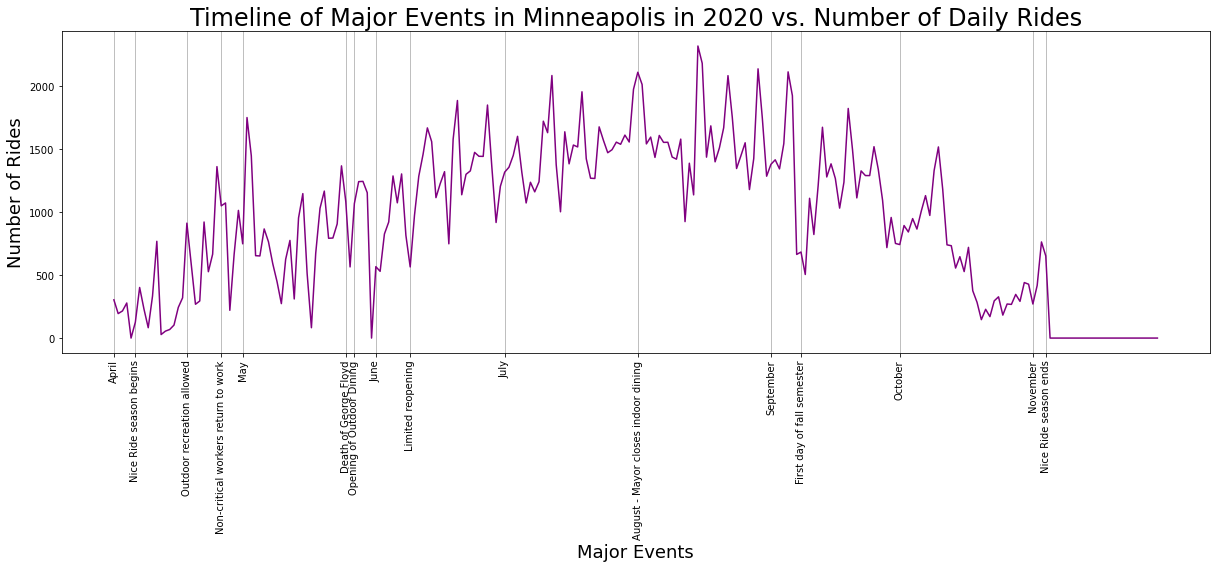

In [31]:
plt.figure(figsize=(17,8))
x_axis = np.arange(1,245,1)
y_values = rides_by_month["2020"]
plt.plot(x_axis, y_values, color="purple")

plt.xticks(x_tick_locations, xtick_labels, rotation="vertical")
plt.title("Timeline of Major Events in Minneapolis in 2020 vs. Number of Daily Rides", fontsize=24)
plt.xlabel("Major Events", fontsize=18)
plt.ylabel("Number of Rides", fontsize=18)
plt.grid(axis = "x")
plt.tight_layout()
plt.savefig("Images/Major-Events-2020.png")
plt.show()

Looking at this chart, we do not see any distinct patterns suggesting that the events of the timeline had a discernable effect on niceride ridership. Remembering that the '0' data points on 4/5 and 5/31 are anomalies caused by missing data, we see the 2020 line following the same seasonal pattern that previous years followed. There is an increase in ridership after the "limited reopening" on June 9, but it is unclear that this increase might be attributable to that, rather than the natural increase pattern that occurs every year.

From this, we concluded that daily ridership was mostly likely dictated by factors other than Covid-19 restrictions. We decided to look at the data in a couple of other ways, to see if we could pinpoint what some of those factors might be.

#### Looking at other influencing factors in determining daily rides

The first thing we looked at was if there were ridership patterns based on the day of the week. We grouped the data for each year by day of the week, and charted how the day of the week affected the number of rides.

In [32]:
# 2020 by day of week
grouped_2020.head()

Sunday20 = grouped_2020.loc[grouped_2020["dayofweek"] == 6].num_rides.sum()
Monday20 = grouped_2020.loc[grouped_2020["dayofweek"] == 0].num_rides.sum()
Tuesday20 = grouped_2020.loc[grouped_2020["dayofweek"] == 1].num_rides.sum()
Wednesday20 = grouped_2020.loc[grouped_2020["dayofweek"] == 2].num_rides.sum()
Thursday20 = grouped_2020.loc[grouped_2020["dayofweek"] == 3].num_rides.sum()
Friday20 = grouped_2020.loc[grouped_2020["dayofweek"] == 4].num_rides.sum()
Saturday20 = grouped_2020.loc[grouped_2020["dayofweek"] == 5].num_rides.sum()
print(Sunday20)
print(Monday20)
print(Tuesday20)
print(Wednesday20)
print(Thursday20)
print(Friday20)
print(Saturday20)

35277
28037
28815
30627
30658
34413
41250


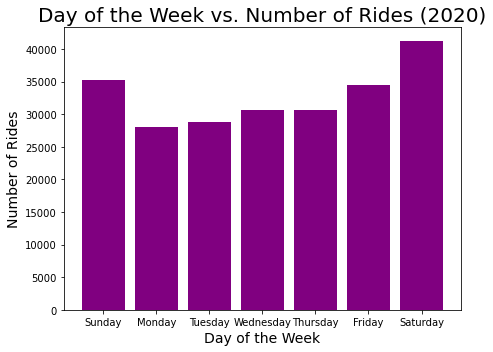

In [33]:
x_axis = np.arange(1,8,1)
rides_20 = [Sunday20, Monday20, Tuesday20, Wednesday20, Thursday20, Friday20, Saturday20]
plt.figure(figsize=(7,5))
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.bar(x_axis, rides_20, color="purple", tick_label=labels)
plt.title("Day of the Week vs. Number of Rides (2020)", fontsize=20)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Number of Rides", fontsize=14)
plt.tight_layout()
plt.savefig("Images/2020-Day-of-Week.png")
plt.show()

We can clearly see that ridership is highest on the weekend; Saturday having the greatest percentage, followed by Sunday and then closely by Friday. One possible explaination is that people may be using the bikes predominently for leisure riding, rather than communting to and from work or class. 

We next compared this distribution to the other years in our data, to see if the pattern is different or the same. In order to make a fair comparison, we calculated the percentage of the total number of rides that each day held. This allowed us to compare across years more easily.

In [34]:
# Compare this to previous years
#2019
Sunday19 = grouped_2019.loc[grouped_2019["dayofweek"] == 6].num_rides.sum()
Monday19 = grouped_2019.loc[grouped_2019["dayofweek"] == 0].num_rides.sum()
Tuesday19 = grouped_2019.loc[grouped_2019["dayofweek"] == 1].num_rides.sum()
Wednesday19 = grouped_2019.loc[grouped_2019["dayofweek"] == 2].num_rides.sum()
Thursday19 = grouped_2019.loc[grouped_2019["dayofweek"] == 3].num_rides.sum()
Friday19 = grouped_2019.loc[grouped_2019["dayofweek"] == 4].num_rides.sum()
Saturday19 = grouped_2019.loc[grouped_2019["dayofweek"] == 5].num_rides.sum()
rides_19 = [Sunday19, Monday19, Tuesday19, Wednesday19, Thursday19, Friday19, Saturday19]

#2018
Sunday18 = grouped_2018.loc[grouped_2018["dayofweek"] == 6].num_rides.sum()
Monday18 = grouped_2018.loc[grouped_2018["dayofweek"] == 0].num_rides.sum()
Tuesday18 = grouped_2018.loc[grouped_2018["dayofweek"] == 1].num_rides.sum()
Wednesday18 = grouped_2018.loc[grouped_2018["dayofweek"] == 2].num_rides.sum()
Thursday18 = grouped_2018.loc[grouped_2018["dayofweek"] == 3].num_rides.sum()
Friday18 = grouped_2018.loc[grouped_2018["dayofweek"] == 4].num_rides.sum()
Saturday18 = grouped_2018.loc[grouped_2018["dayofweek"] == 5].num_rides.sum()
rides_18 = [Sunday18, Monday18, Tuesday18, Wednesday18, Thursday18, Friday18, Saturday18]

#2017
Sunday17 = grouped_2017.loc[grouped_2017["dayofweek"] == 6].num_rides.sum()
Monday17 = grouped_2017.loc[grouped_2017["dayofweek"] == 0].num_rides.sum()
Tuesday17 = grouped_2017.loc[grouped_2017["dayofweek"] == 1].num_rides.sum()
Wednesday17 = grouped_2017.loc[grouped_2017["dayofweek"] == 2].num_rides.sum()
Thursday17 = grouped_2017.loc[grouped_2017["dayofweek"] == 3].num_rides.sum()
Friday17 = grouped_2017.loc[grouped_2017["dayofweek"] == 4].num_rides.sum()
Saturday17 = grouped_2017.loc[grouped_2017["dayofweek"] == 5].num_rides.sum()
rides_17 = [Sunday17, Monday17, Tuesday17, Wednesday17, Thursday17, Friday17, Saturday17]

#2016
Sunday16 = grouped_2016.loc[grouped_2016["dayofweek"] == 6].num_rides.sum()
Monday16 = grouped_2016.loc[grouped_2016["dayofweek"] == 0].num_rides.sum()
Tuesday16 = grouped_2016.loc[grouped_2016["dayofweek"] == 1].num_rides.sum()
Wednesday16 = grouped_2016.loc[grouped_2016["dayofweek"] == 2].num_rides.sum()
Thursday16 = grouped_2016.loc[grouped_2016["dayofweek"] == 3].num_rides.sum()
Friday16 = grouped_2016.loc[grouped_2016["dayofweek"] == 4].num_rides.sum()
Saturday16 = grouped_2016.loc[grouped_2016["dayofweek"] == 5].num_rides.sum()
rides_16 = [Sunday16, Monday16, Tuesday16, Wednesday16, Thursday16, Friday16, Saturday16]

#2015
Sunday15 = grouped_2015.loc[grouped_2015["dayofweek"] == 6].num_rides.sum()
Monday15 = grouped_2015.loc[grouped_2015["dayofweek"] == 0].num_rides.sum()
Tuesday15 = grouped_2015.loc[grouped_2015["dayofweek"] == 1].num_rides.sum()
Wednesday15 = grouped_2015.loc[grouped_2015["dayofweek"] == 2].num_rides.sum()
Thursday15 = grouped_2015.loc[grouped_2015["dayofweek"] == 3].num_rides.sum()
Friday15 = grouped_2015.loc[grouped_2015["dayofweek"] == 4].num_rides.sum()
Saturday15 = grouped_2015.loc[grouped_2015["dayofweek"] == 5].num_rides.sum()
rides_15 = [Sunday15, Monday15, Tuesday15, Wednesday15, Thursday15, Friday15, Saturday15]

In [35]:
# Calculate percentages for comparison purposes
total_20 = sum([Sunday20, Monday20, Tuesday20, Wednesday20, Thursday20, Friday20, Saturday20])
total_19 = sum([Sunday19, Monday19, Tuesday19, Wednesday19, Thursday19, Friday19, Saturday19])
total_18 = sum([Sunday18, Monday18, Tuesday18, Wednesday18, Thursday18, Friday18, Saturday18])
total_17 = sum([Sunday17, Monday17, Tuesday17, Wednesday17, Thursday17, Friday17, Saturday17])
total_16 = sum([Sunday16, Monday16, Tuesday16, Wednesday16, Thursday16, Friday16, Saturday16])
total_15 = sum([Sunday15, Monday15, Tuesday15, Wednesday15, Thursday15, Friday15, Saturday15])

percent_20 = [((Sunday20 / total_20)*100), ((Monday20 / total_20)*100), 
              ((Tuesday20 / total_20)*100), ((Wednesday20 / total_20)*100),
              ((Thursday20 / total_20)*100), ((Friday20 / total_20)*100), ((Saturday20 / total_20)*100)]
#print(percent_20)

percent_19 = [((Sunday19 / total_19)*100), ((Monday19 / total_19)*100), 
              ((Tuesday19 / total_19)*100), ((Wednesday19 / total_19)*100),
              ((Thursday19 / total_19)*100), ((Friday19 / total_19)*100), ((Saturday19 / total_19)*100)]
#print(percent_19)

percent_18 = [((Sunday18 / total_18)*100), ((Monday18 / total_18)*100), 
              ((Tuesday18 / total_18)*100), ((Wednesday18 / total_18)*100),
              ((Thursday18 / total_18)*100), ((Friday18 / total_18)*100), ((Saturday18 / total_18)*100)]
#print(percent_18)

percent_17 = [((Sunday17 / total_17)*100), ((Monday17 / total_17)*100), 
              ((Tuesday17 / total_17)*100), ((Wednesday17 / total_17)*100),
              ((Thursday17 / total_17)*100), ((Friday17 / total_17)*100), ((Saturday17 / total_17)*100)]
#print(percent_17)

percent_16 = [((Sunday16 / total_16)*100), ((Monday16 / total_16)*100), 
              ((Tuesday16 / total_16)*100), ((Wednesday16 / total_16)*100),
              ((Thursday16 / total_16)*100), ((Friday16 / total_16)*100), ((Saturday16 / total_16)*100)]
#print(percent_16)

percent_15 = [((Sunday15 / total_15)*100), ((Monday15 / total_15)*100), 
              ((Tuesday15 / total_15)*100), ((Wednesday15 / total_15)*100),
              ((Thursday15 / total_15)*100), ((Friday15 / total_15)*100), ((Saturday15 / total_15)*100)]
#print(percent_15)

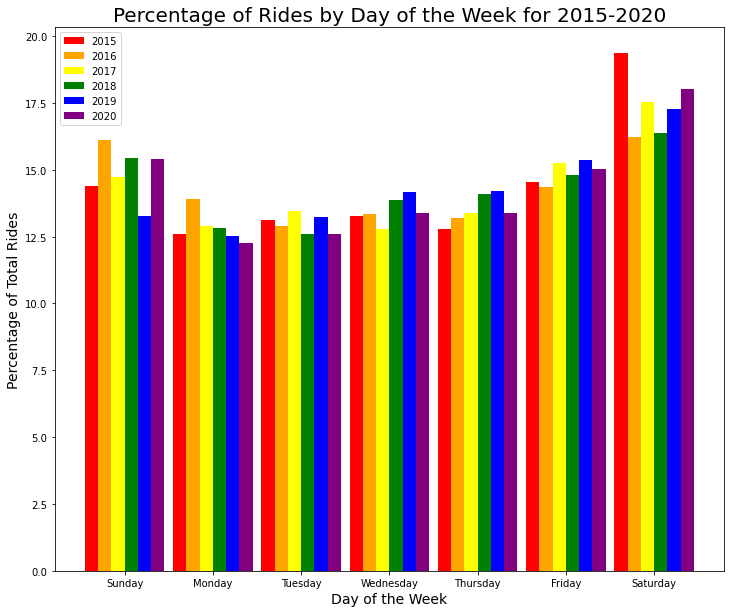

In [36]:
# Plot days of the week comparison

plt.figure(figsize=(12,10))
width = 0.15  # the width of the bars

# set height of bar
bars1 = percent_15
bars2 = percent_16
bars3 = percent_17
bars4 = percent_18
bars5 = percent_19
bars6 = percent_20
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]


# Make the plot
plt.bar(r1, bars1, color='red', width=width, label='2015')
plt.bar(r2, bars2, color='orange', width=width, label='2016')
plt.bar(r3, bars3, color='yellow', width=width, label='2017')
plt.bar(r4, bars4, color='green', width=width, label='2018')
plt.bar(r5, bars5, color='blue', width=width, label='2019')
plt.bar(r6, bars6, color='purple', width=width, label='2020')
 
# Add xticks on the middle of the group bars
plt.xlabel('Day of the Week', fontsize=14)
plt.xticks([r + (2.5 * width) for r in range(len(bars1))], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.ylabel ('Percentage of Total Rides', fontsize=14)
plt.title('Percentage of Rides by Day of the Week for 2015-2020', fontsize=20)
# Create legend & Show graphic
plt.legend()
plt.savefig("Images/All-Years-Day-of-Week.png")
plt.show()

Interestingly, although there are a few deviations, the weekly ridership percentages tend to mirror the same curve that 2020 shows. If we average ridership by day of the week for 2015-2019, we can compare it more directly to 2020:

In [37]:
# Calculate daily mean for 2015-2019
Sunday_m = np.mean([percent_15[0], percent_16[0], percent_17[0], percent_18[0], percent_19[0]])
Monday_m = np.mean([percent_15[1], percent_16[1], percent_17[1], percent_18[1], percent_19[1]])
Tuesday_m = np.mean([percent_15[2], percent_16[2], percent_17[2], percent_18[2], percent_19[2]])
Wednesday_m = np.mean([percent_15[3], percent_16[3], percent_17[3], percent_18[3], percent_19[3]])
Thursday_m = np.mean([percent_15[4], percent_16[4], percent_17[4], percent_18[4], percent_19[4]])
Friday_m = np.mean([percent_15[5], percent_16[5], percent_17[5], percent_18[5], percent_19[5]])
Saturday_m = np.mean([percent_15[6], percent_16[6], percent_17[6], percent_18[6], percent_19[6]])

percent_mean = [Sunday_m, Monday_m, Tuesday_m, Wednesday_m, Thursday_m, Friday_m, Saturday_m]
#print(percent_mean)

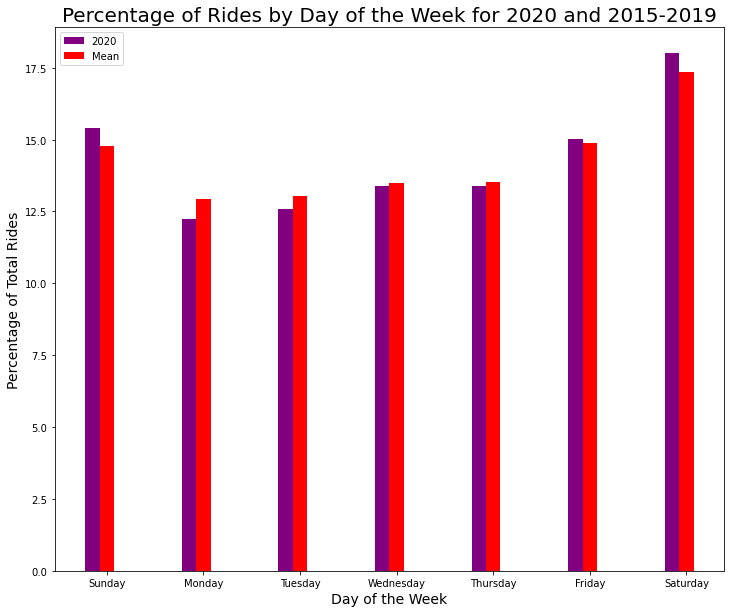

In [38]:
# Plot days of the week comparison

plt.figure(figsize=(12,10))
width = 0.15  # the width of the bars

# set height of bar
bars1 = percent_20
bars2 = percent_mean
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]

# Make the plot
plt.bar(r1, bars1, color='purple', width=width, label='2020')
plt.bar(r2, bars2, color='red', width=width, label='Mean')

# Add xticks on the middle of the group bars
plt.xlabel('Day of the Week', fontsize=14)
plt.xticks([r + width for r in range(len(bars1))], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.ylabel ('Percentage of Total Rides', fontsize=14)
plt.title('Percentage of Rides by Day of the Week for 2020 and 2015-2019', fontsize=20)
# Create legend & Show graphic
plt.legend()
plt.savefig("Images/Day-of-Week-Comparison.png")
plt.show()

While the differences are small, we do see here that ridership was higher than average on the weekends and slightly lower than average on weekdays in 2020. In a very general way, this supports the idea that ridership was more anchored in leisure than commuting for the 2020 season. We would have to look at several other factors to be able to conclude that Covid-19 caused the changes we see here, as well as analyze whether these small differences are statistically significant or if they fall within the normal ranges for ridership based on day of the week.

#### Looking at weather patterns in relationship to daily rides

The next factor that seemed obvious to check was weather. Presumably, ridership would decline if the temperature was too hot or too cold, or if it poured rain on a particular day. We requested weather data for MSP airport for the duration of the 2020 niceride season, and used that to look at how temperature and precipitation might have affected ridership, and how much of an effect it might have had.

In [39]:
# Import weather data for 2020
# Data source is NOAA Climate Data Online: https://www.ncdc.noaa.gov/cdo-web/
# Station ID: MSP = USW00014922
weather_path = "Resources/NOAA_2020_data.csv"
weather = pd.read_csv(weather_path)
weather_df = pd.DataFrame(weather)
weather_df.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2020-04-01,0.00,0.0,0.0,44,55,34
1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2020-04-02,0.07,0.0,0.0,51,61,40
2,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2020-04-03,0.08,0.0,0.0,37,40,25
3,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2020-04-04,0.00,0.0,0.0,29,45,19
4,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2020-04-05,0.00,0.0,0.0,40,56,29


In [40]:
# Eliminate unneeded data

keep_cols = ["STATION", "NAME", "DATE", "PRCP", "SNOW", "TAVG", "TMAX", "TMIN"]
weather_df = weather_df[keep_cols]
weather_df.head()

,STATION,NAME,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2020-04-01,0.00,0.0,44,55,34
1,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2020-04-02,0.07,0.0,51,61,40
2,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2020-04-03,0.08,0.0,37,40,25
3,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2020-04-04,0.00,0.0,29,45,19
4,USW00014922,"MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN US",2020-04-05,0.00,0.0,40,56,29


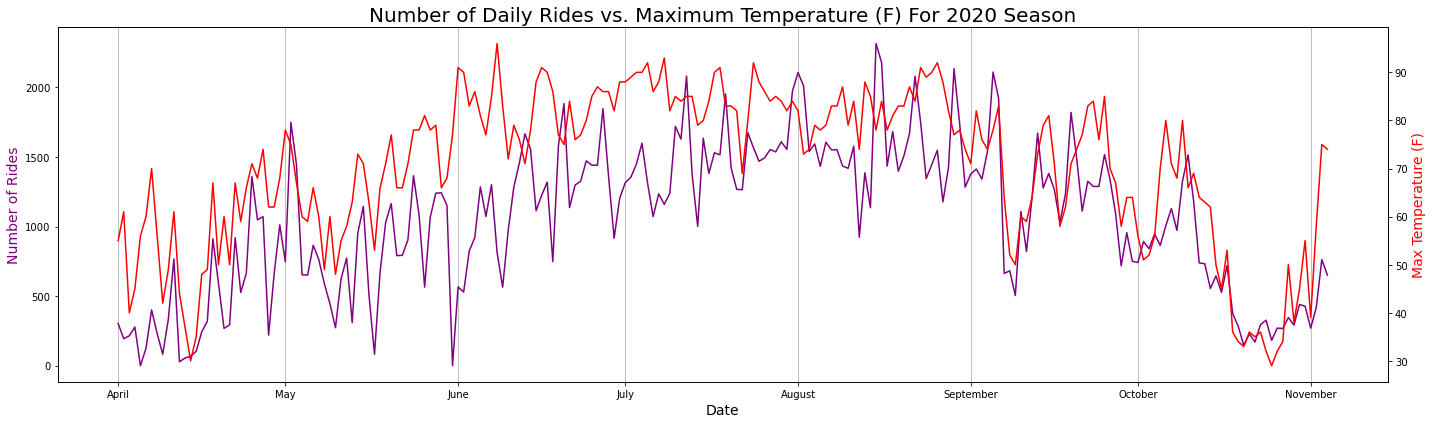

In [41]:
# New Plot - Compare rides to temperature
# Define xticks for plot by day

Apr = 1
May = 30 + 1
June = 30 + 31 + 1
July = 30 + 31 + 30 + 1
Aug = 30 + 31 + 30 + 31 + 1
Sep = 30 + 31 + 30 + 31 + 31 + 1
Oct = 30 + 31 + 30 + 31 + 31 + 30 + 1
Nov = 30 + 31 + 30 + 31 + 31 + 30 + 31 + 1

month_locations = np.array([Apr, May, June, July, Aug, Sep, Oct, Nov])
#print(month_locations)

month_labels = np.array(["April", "May", "June", "July", "August", "September", "October", "November"])
#print(month_labels)

#Define parameters for plot by day
months=np.arange(4,12,1)
x_month = [month for month in months]
rides = grouped_2020.loc[x_month]
x= len(rides) +3
x_axis = np.arange(1,x,1)

# Draw plot
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(x_axis, daily_rides_copy, color="purple")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Number of Rides",color="purple",fontsize=14)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(month_locations)
ax.xaxis.set_ticklabels(month_labels)
plt.grid(which="major", axis="x")
ax2=ax.twinx()
ax2.plot(x_axis, weather_df["TMAX"], color="red")
ax2.set_ylabel("Max Temperature (F)", color="red", fontsize=14)
plt.title("Number of Daily Rides vs. Maximum Temperature (F) For 2020 Season", fontsize=20)
plt.tight_layout()
plt.savefig("Images/2020-Rides-v-Temps.png")
plt.show()

This plot is interesting, because it shows that the basic ridership curve follows the basic curve of max temperatures over the 2020 season. We can see that the temperature line and rides line come close together when the temperature is in a certain "comfort zone," and that when the temp spikes too high or drops too low, ridership declines. This is unsurprisingly a complex relationship to quantify, and more data and visualizations would be necessary to pin a direct relationship between rides and temperature, likely on an hour-by-hour basis, which is more granularity than this weather data provides for. Howevwer, we can see a basic relationship begin to form here. We can examine this relationship further by performing a linear regression comparing temperatures to daily rides, and get a general sense of how important the temperature is on a given day in determining how many people decide to go for a bike ride.

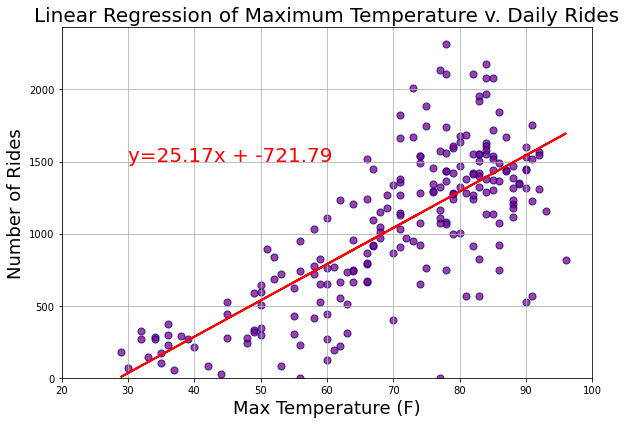

The r-value is 0.748771370416134.


In [42]:
# Make scatter plot looking at linear regression of temperature v number of rides

from scipy.stats import linregress

x = weather_df["TMAX"]
y = daily_rides_copy

#calculate regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)

x = weather_df["TMAX"]
y = daily_rides_copy
ymax = max(y)
ymin = min(y)

plt.figure(figsize=(9,6))
plt.scatter(x, y, marker="o", s=50, facecolor="purple", edgecolors="darkblue", alpha=0.75, linewidths=1)
plt.xlim(20,100)
plt.ylim(1.05*ymin, 1.05*ymax)
plt.xlabel("Max Temperature (F)", fontsize=18)
plt.ylabel("Number of Rides", fontsize=18)
plt.title("Linear Regression of Maximum Temperature v. Daily Rides", fontsize=20)
plt.plot(x, regress, color='red', linewidth=2)
plt.annotate(line_eq, (30, 1500), fontsize=20, color="red")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Temp-lin-regress-2020.png")
plt.show()

print(f"The r-value is {rvalue}.")

An r-value of .75 suggests a significantly strong correlation between temperature and the total number of rides that people took in 2020. If we factor in the idea that our day-of-week data show that perhaps more rides were taken for leisure in 2020 than in normal years, it is unsuprising to see that the temperature played an important role in people's decisions whether or not to go for a bike ride. When one doesn't HAVE to travel by bicycle, one can make a choice to rent a bike based on how pleasurable that ride will be. 

We also looked at precipitation data, to see if they had a similar effect on ridership numbers.

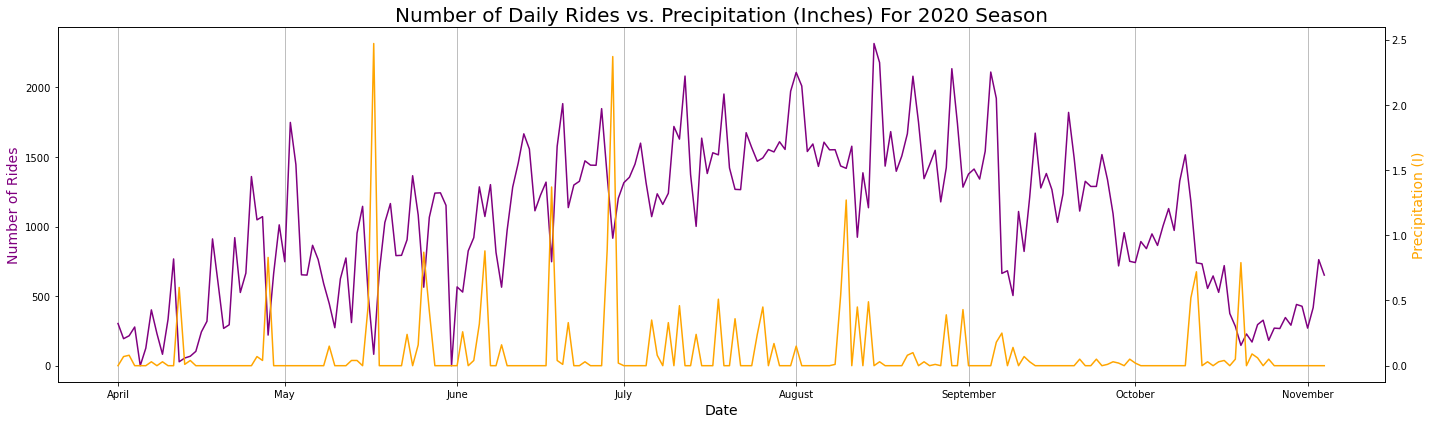

In [43]:
# New Plot - Compare rides to rainfall
#Define parameters for plot by day

months=np.arange(4,12,1)
x_month = [month for month in months]
rides = grouped_2020.loc[x_month]
x= len(rides) +3
x_axis = np.arange(1,x,1)


# Draw plot
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(x_axis, daily_rides_copy, color="purple")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Number of Rides",color="purple",fontsize=14)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(month_locations)
ax.xaxis.set_ticklabels(month_labels)
plt.grid(which="major", axis="x")
ax2=ax.twinx()
ax2.plot(x_axis, weather_df["PRCP"], color="orange")
ax2.set_ylabel("Precipitation (I)", color="orange", fontsize=14)
plt.title("Number of Daily Rides vs. Precipitation (Inches) For 2020 Season", fontsize=20)
plt.savefig("Images/2020-Rides-v-Rain.png")
plt.tight_layout()
plt.show()

Here we see that days with significant rainfall had corresponding drops in ridership, but that on the whole, small amounts of precipitation had no significant impact on ridership. It is difficult to parse these particular data, since we do not have hour-by-hour rainfall totals to compare to hour-by-hour niceride rides. It is possible that the rain fell entirely at night, or that it came in a large late-afternoon thunderstorm (as is often the case in MN), while the weather at the beginning of the day may have been perfect for riding a bike. A linear regression of these data shows that it is difficult to draw conclusions based on total rainfall, likely for precisely these reasons:

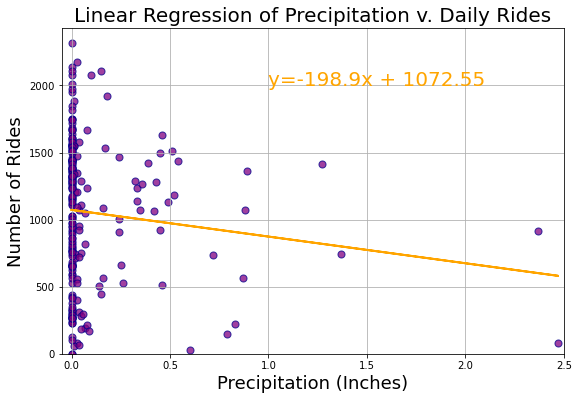

The r-value is -0.11504714326124081.


In [46]:
# Make a linear regression comparing precipitation to daily rides

x = weather_df["PRCP"]
y = daily_rides_copy

#calculate regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)

x = weather_df["PRCP"]
y = daily_rides_copy
ymax = max(y)
ymin = min(y)

plt.figure(figsize=(9,6))
plt.scatter(x, y, marker="o", s=50, facecolor="purple", edgecolors="darkblue", alpha=0.75, linewidths=1)
plt.xlim(-0.05,2.5)
plt.ylim(1.05*ymin, 1.05*ymax)
plt.xlabel("Precipitation (Inches)", fontsize=18)
plt.ylabel("Number of Rides", fontsize=18)
plt.title("Linear Regression of Precipitation v. Daily Rides", fontsize=20)
plt.plot(x, regress, color='orange', linewidth=2)
plt.annotate(line_eq, (1,2000), fontsize=20, color="orange")
plt.grid()
#plt.tight_layout()
plt.savefig("Images/Temp-lin-regress-2020.png")
plt.show()

print(f"The r-value is {rvalue}.")

An r-value of -0.12 shows that there is little overall correlation between rainfall totals and daily ridership. In order to draw conclusions from this dataset, we would need more granular information about the total rainfall per hour, so we could compare it to ride start times.

# This is the end of the Steph section

# Luis' code - Monthly Ridership Line Plots

In [ ]:
# 2015
by_month_2015 = df_2015[["start_datetime", "month"]].groupby("month").count()
by_month_2015.rename(columns = {"start_datetime": "2015"}, inplace = True)
by_month_2015

In [ ]:
# 2016
by_month_2016 = df_2016[["start_datetime", "month"]].groupby("month").count()
by_month_2016.rename(columns = {"start_datetime": "2016"}, inplace = True)
by_month_2016

In [ ]:
# 2017
by_month_2017 = df_2017[["start_datetime", "month"]].groupby("month").count()
by_month_2017.rename(columns = {"start_datetime": "2017"}, inplace = True)
by_month_2017

In [ ]:
# 2018
by_month_2018 = df_2018[["start_datetime", "month"]].groupby("month").count()
by_month_2018.rename(columns = {"start_datetime": "2018"}, inplace = True)
by_month_2018

In [ ]:
# 2019
by_month_2019 = df_2019[["start_datetime", "month"]].groupby("month").count()
by_month_2019.rename(columns = {"start_datetime": "2019"}, inplace = True)
by_month_2019

In [ ]:
# 2018
by_month_2020 = df_2020[["start_datetime", "month"]].groupby("month").count()
by_month_2020.rename(columns = {"start_datetime": "2020"}, inplace = True)
by_month_2020

In [ ]:
# Join dataframes using concat

rides_by_month = pd.concat([by_month_2015, by_month_2016, by_month_2017, by_month_2018, by_month_2019, by_month_2020], axis = 1)

# Set index to the months

months_list = ["April", "May", "June", "July", "August", "September", "October", "November"]

rides_by_month.index = months_list

rides_by_month

In [ ]:
rides_by_month.plot(kind = "line")
plt.legend(loc = "upper right")
plt.xticks(rotation = 45)
plt.show()

# end of Luis Code

# This is the Rachel section - begin here

In [ ]:
ride_count_2015 = len(year_2015)
ride_count_2016 = len(year_2016)
ride_count_2017 = len(year_2017)
ride_count_2018 = len(year_2018)
ride_count_2019 = len(year_2019)
ride_count_2020 = len(year_2020)

In [ ]:

total_ridership_by_year = {'2015' : ride_count_2015,
                           '2016' : ride_count_2016,
                           '2017' : ride_count_2017,
                           '2018' : ride_count_2018,
                           '2019' : ride_count_2019,
                           '2020' : ride_count_2020
                          }

years = list(total_ridership_by_year.keys())
rides = list(total_ridership_by_year.values())

plt.bar(years, rides, color = 'maroon', width = .5)

In [ ]:
#convert dictionary to dataframe
total_ridership_by_year_df = pd.DataFrame(list(total_ridership_by_year.items()), columns = ['year','ride'])

each_year = total_ridership_by_year_df["year"].astype(str).astype(int)
total_rides = total_ridership_by_year_df["ride"].astype(str).astype(int)

total_rides

#total_ridership_by_year_df


In [ ]:
print(f"The correlation coefficient is {round(st.pearsonr(each_year,total_rides)[0],2)}")

In [ ]:

cap_slope, cap_intercept, cap_r, cap_p, cap_std_err = st.linregress(each_year, total_rides)


print (f'linear regression: \n   slope = {cap_slope}\n   intercept = {cap_intercept}\n   rvalue = {cap_r}\n   pvalue = {cap_p}\n   std error = {cap_std_err}')

In [ ]:
year = total_ridership_by_year_df.iloc[:,0]
ride = total_ridership_by_year_df.iloc[:,1]

plt.scatter(each_year, total_rides)

In [ ]:

year = total_ridership_by_year_df.iloc[:,0].astype("float")
ride = total_ridership_by_year_df.iloc[:,1]

plt.scatter(each_year, total_rides)

#plot the linear model on top of scatter plot
fit = cap_slope * year + cap_intercept

plt.plot(year, fit, "--")

#label
plt.xlabel('Year')
plt.ylabel('Number of Rides')

plt.show()

In [ ]:
prediction = cap_slope * 2020.0 + cap_intercept
prediction

#heat map of start locations

In [ ]:
df_2019.head()

In [ ]:
#returns a list of the station names
start_station_2019 = df_2019.drop_duplicates(subset=['start_station_name'])
start_station_2019 = start_station_2019[["start_station_id", "start_station_name", "start_station_lat", "start_station_lng"]]
start_station_2019

In [ ]:
start_station_count_2019 = df_2019.groupby('start_station_name').count()
start_station_count_2019 = start_station_count_2019[["total_duration_sec"]]
start_station_count_2019 = start_station_count_2019.rename(columns={"total_duration_sec" : "ride_count"})
start_station_count_2019.reset_index()


In [ ]:
#merge
start_station_2019_df = pd.merge(start_station_2019, start_station_count_2019, on = ["start_station_name","start_station_name"])

start_station_2019_df

In [ ]:
gmaps.configure(api_key=g_key)
#latitude and longitude in locations
locations = start_station_2019_df[["start_station_lat","start_station_lng"]]
#count as weight
count = start_station_2019_df["ride_count"]
#Plot Heatmap
fig = gmaps.figure()
#create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count,
                                 dissipating=True, max_intensity=2,
                                 point_radius=3)
#add layer
fig.add_layer(heat_layer)
#display
fig

In [ ]:
df_2020.head()

In [ ]:
#returns a list of the station names
start_station_2020 = df_2020.drop_duplicates(subset=['start_station_name'])
start_station_2020 = start_station_2020[["start_station_id", "start_station_name", "start_station_lat", "start_station_lng"]]
start_station_2020

In [ ]:
start_station_count_2020 = df_2020.groupby('start_station_name').count()
start_station_count_2020 = start_station_count_2020[["start_station_id"]]
start_station_count_2020 = start_station_count_2020.rename(columns={"start_station_id" : "ride_count"})
start_station_count_2020.reset_index()

In [ ]:
#merge
start_station_2020_df = pd.merge(start_station_2020, start_station_count_2020, on = ["start_station_name","start_station_name"])

start_station_2020_df

In [ ]:
gmaps.configure(api_key=g_key)
#latitude and longitude in locations
locations = start_station_2020_df[["start_station_lat","start_station_lng"]]
#count as weight
count = start_station_2020_df["ride_count"]
#Plot Heatmap
fig = gmaps.figure()
#create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count,
                                 dissipating=True, max_intensity=2,
                                 point_radius=3)
#add layer
fig.add_layer(heat_layer)
#display
fig

# This is the Rachel section - end here